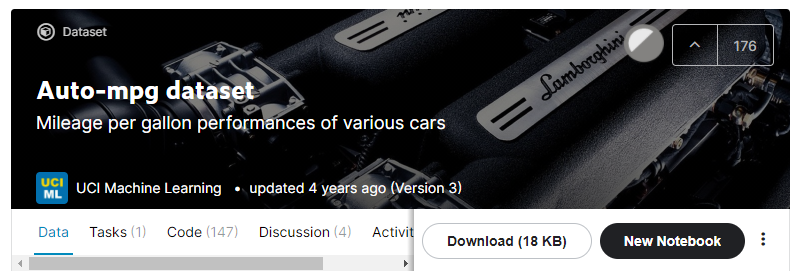

https://www.kaggle.com/uciml/autompg-dataset

### 코랩 그래프 한글폰트 지정


In [ ]:
# 한글폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False

- 런타임 다시 시작 클릭   
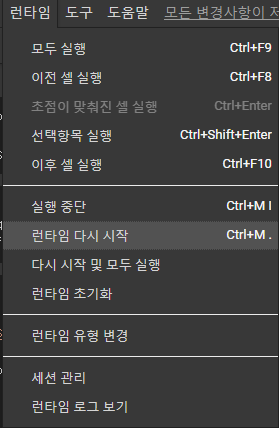

In [ ]:
# 런타임 다시 시작 후 다시 실행
import numpy as np
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 기호 사용

Text(0.5, 0, '시간(분)')

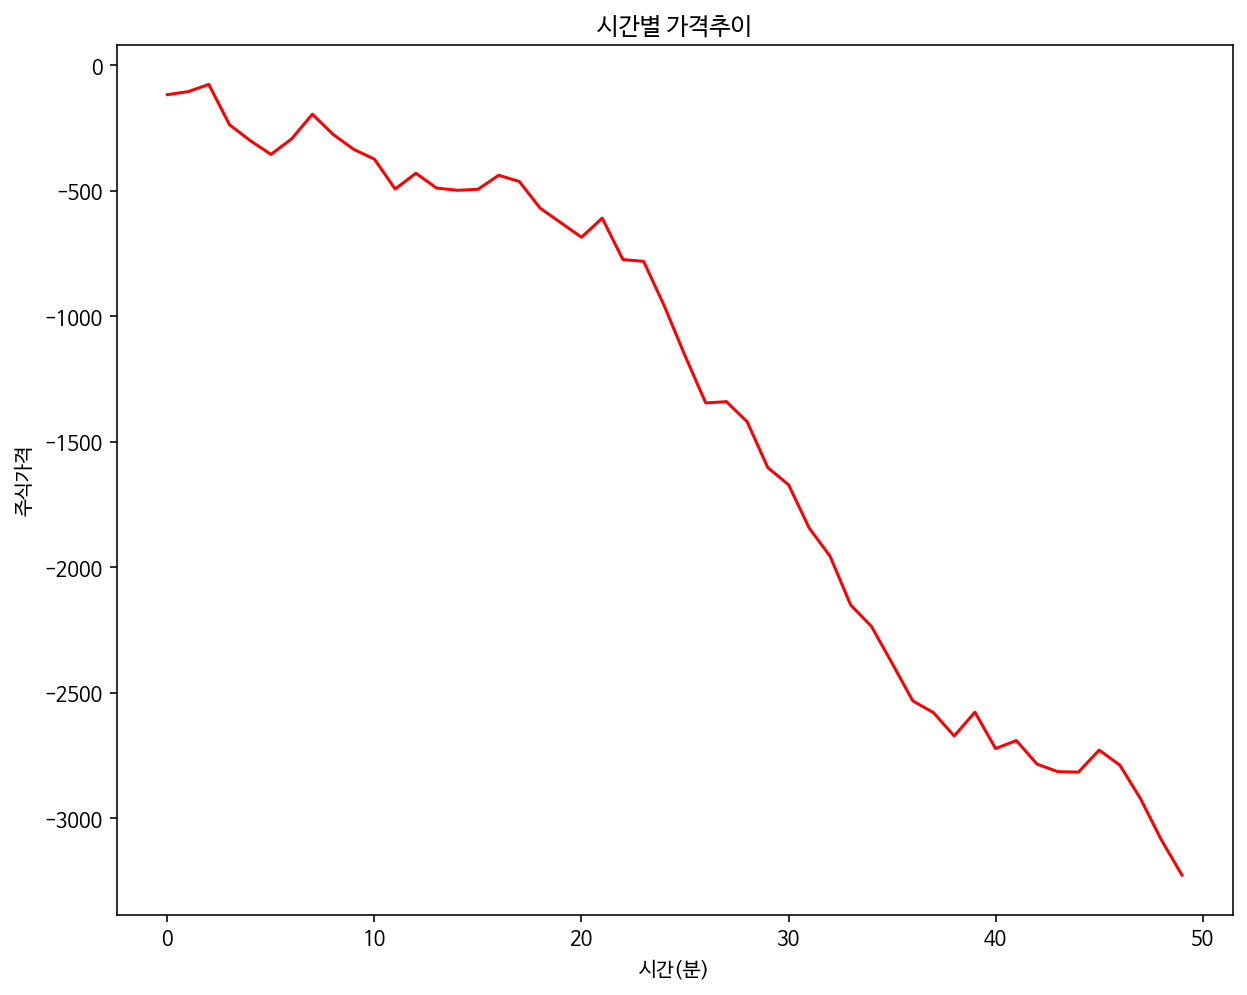

In [ ]:
# [테스트]
# 데이터 준비
data = np.random.randint(-200, 100, 50).cumsum()
# 한글을 넣어놓고 그러보면 깨진다
plt.figure(figsize=(10,8))
plt.plot(range(50), data, 'r')
plt.title('시간별 가격추이')
plt.ylabel('주식가격')
plt.xlabel('시간(분)')

## 회귀분석
- 연속적인 값을 갖는 연속 변수를 예측하는데 사용.   
- 분석 모형이 예측하고자 하는 목표를 종속 변수 또는 예측 변수라 부른다.   
- 예측을 위해 모형이 사용하는 속성을 독립 변수 또는 설명 변수라 부른다.
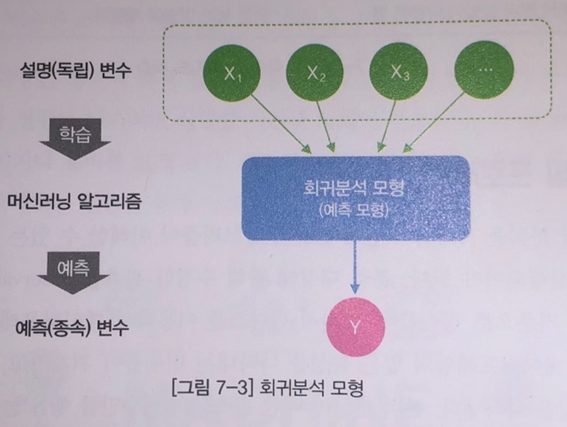

### EDA
[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving auto-mpg.csv to auto-mpg (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# read_csv() 함수로 df 생성
df_auto = pd.read_csv('/content/auto-mpg.csv',header=None)
# 열 이름을 지정
df_auto.columns=['연비(mpg)','실린더 수','배기량','출력','차중',
            '가속능력','출시년도','제조국','모델명']
df_auto.head()

,연비(mpg),실린더 수,배기량,출력,차중,가속능력,출시년도,제조국,모델명
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


[Step 2] 데이터 탐색

In [ ]:
# 데이터 자료형 확인
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연비(mpg)  398 non-null    float64
 1   실린더 수    398 non-null    int64  
 2   배기량      398 non-null    float64
 3   출력       398 non-null    object 
 4   차중       398 non-null    float64
 5   가속능력     398 non-null    float64
 6   출시년도     398 non-null    int64  
 7   제조국      398 non-null    int64  
 8   모델명      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
# 데이터 통계 요약정보 확인
df_auto.describe()

,연비(mpg),실린더 수,배기량,차중,가속능력,출시년도,제조국
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# 출력 열의 자료형 변경 (문자열 ->숫자)
df_auto['출력'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
df_auto['출력'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df_auto.dropna(subset=['출력'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df_auto['출력'] = df_auto['출력'].astype('float')      # 문자열을 실수형으로 변환

In [ ]:
df_auto['출력'].isnull().sum()

0

### 단순회귀분석
- 어떤 독립 변수(X)가 종속 변수(Y)에 영향을 준다면 두 변수 사이에 선형관계가 있다고 이야기 한다.   
- 데이터간의 선형 관계가 있다면 새로운 독립 변수(X)가 주어졌을 때 거기에 대응되는 종속 변수(Y)를 예측 할 수 있다.   
  
- 수학적으로 종속 변수(Y)와 독립 변수(X) 사이의 관계를 1차 함수 Y=aX+b로 나타낸다.  




[Step 3] 속성(feature 또는 variable) 선택

In [ ]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df_auto[['연비(mpg)','실린더 수','출력','차중']]
ndf.head()

,연비(mpg),실린더 수,출력,차중
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


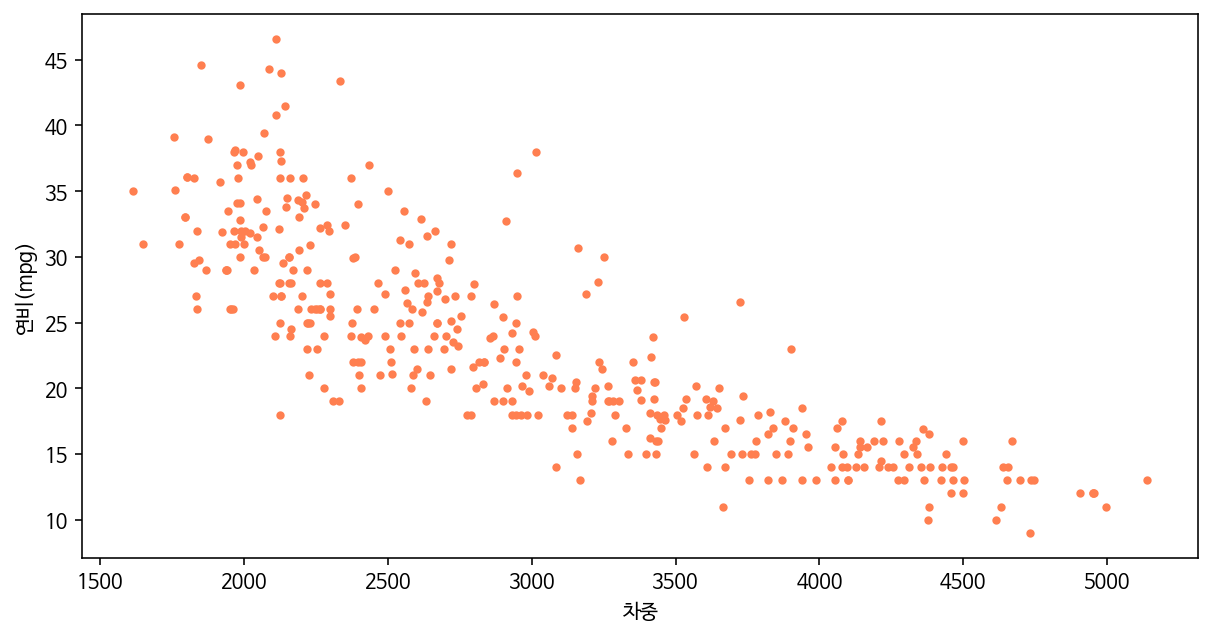

In [ ]:
### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='차중', y='연비(mpg)',  
         c='coral', s=10, figsize=(10, 5))
plt.show()

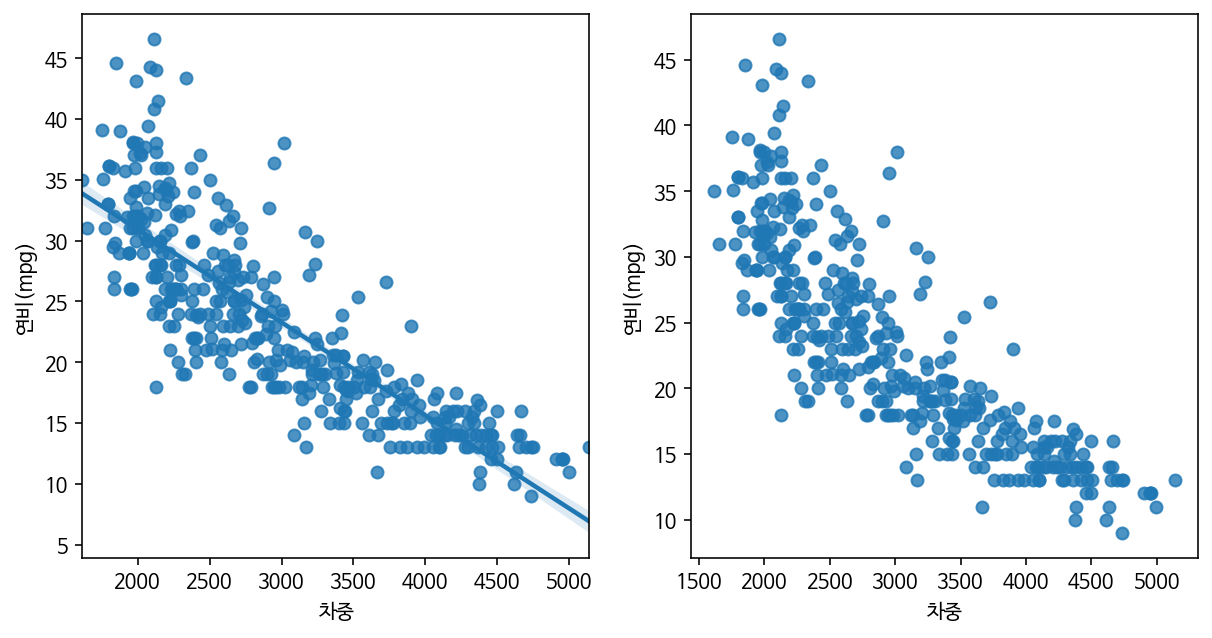

In [ ]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='차중', y='연비(mpg)', data=ndf, ax=ax1)# 회귀선 표시
sns.regplot(x='차중', y='연비(mpg)', data=ndf, ax=ax2, 
            fit_reg=False)  #회귀선 미표시
plt.show()

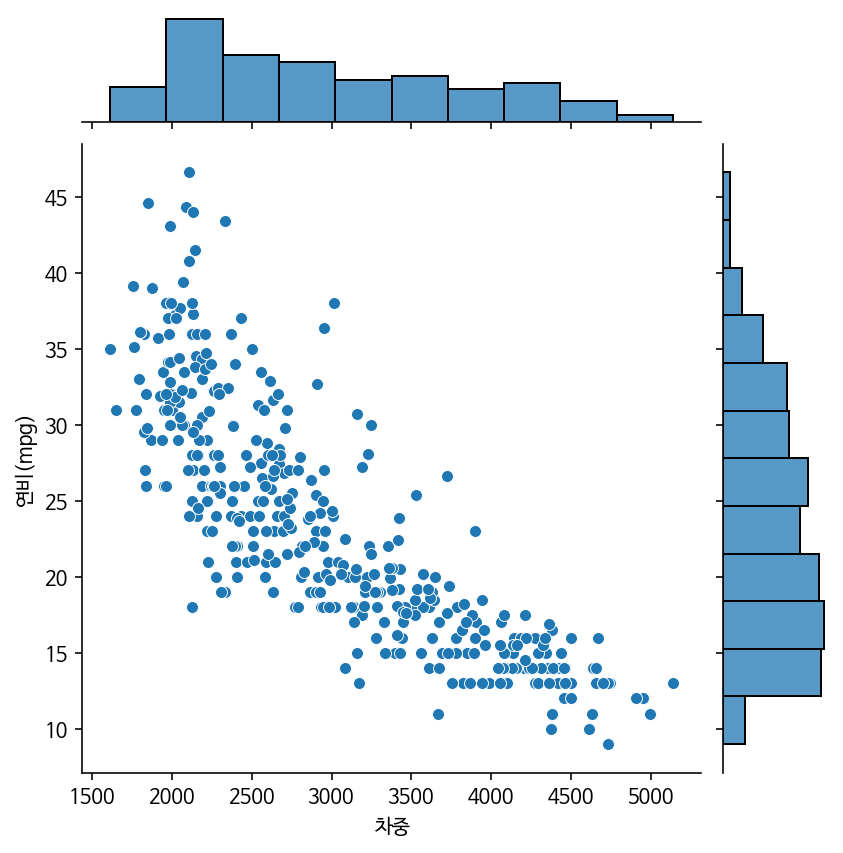

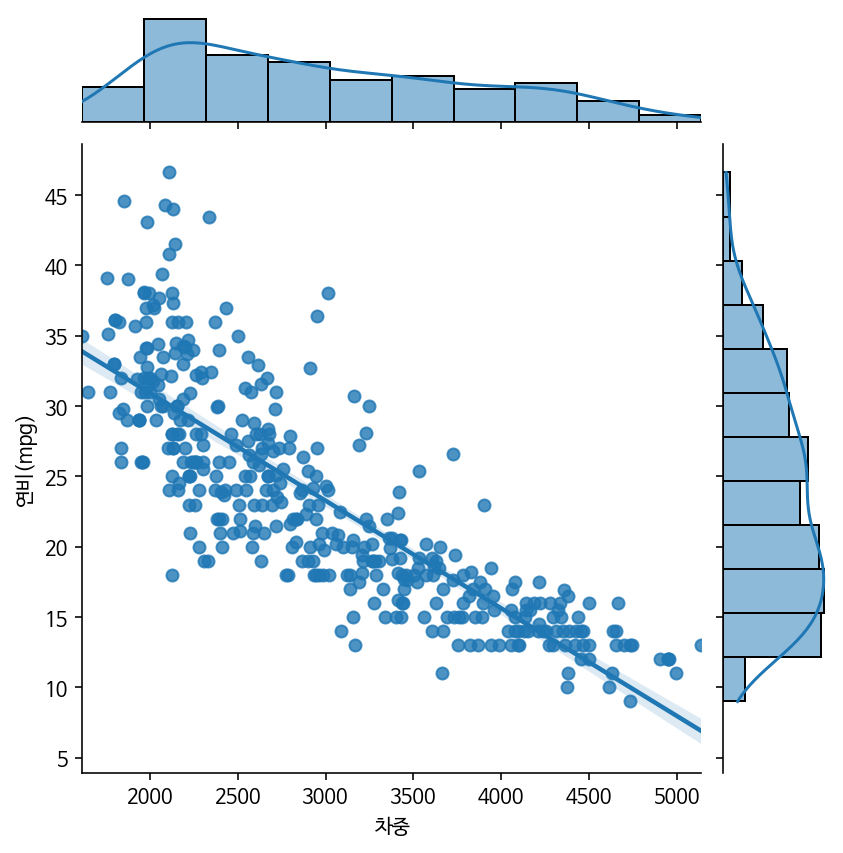

In [ ]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='차중', y='연비(mpg)', data=ndf)              # 회귀선 없음
sns.jointplot(x='차중', y='연비(mpg)', kind='reg', data=ndf)  # 회귀선 표시
plt.show()

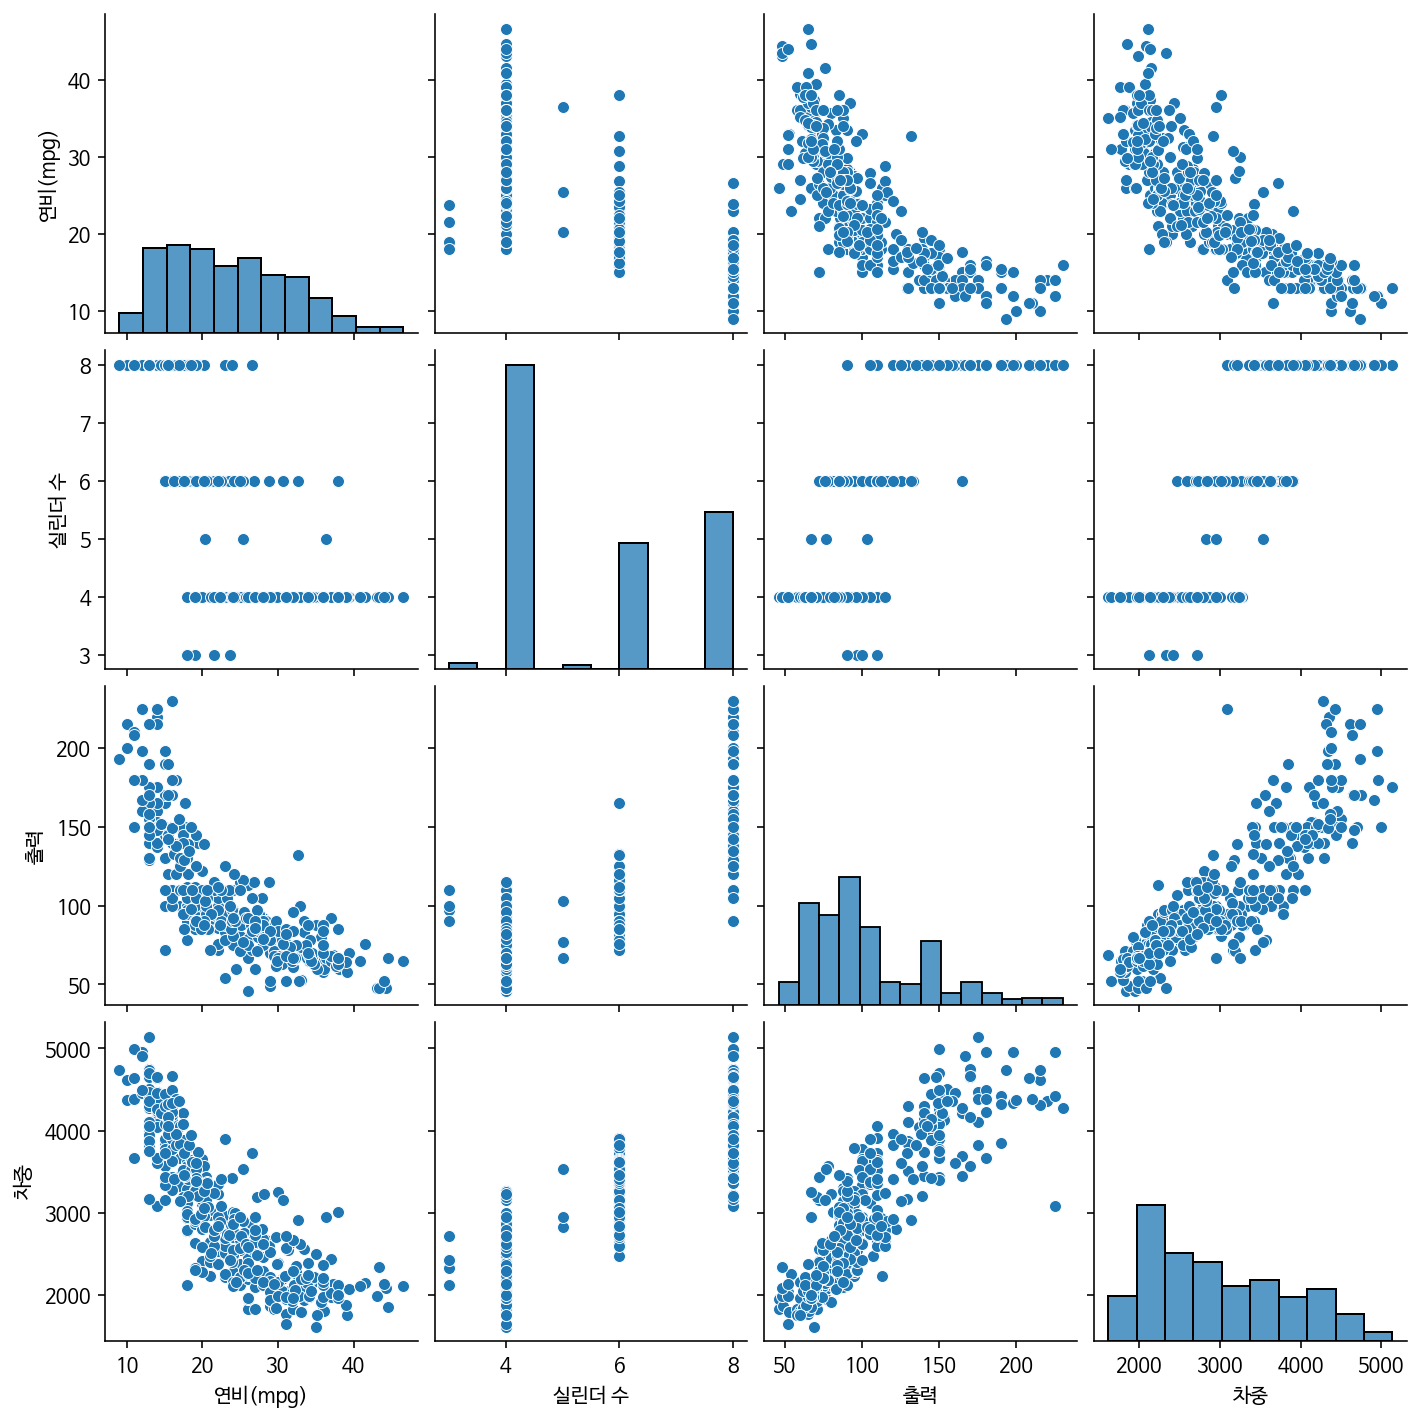

In [ ]:
# seaborn pairplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)  
plt.show()

[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)


In [ ]:
# 속성(변수) 선택
X=ndf[['차중']]  #독립 변수 X
y=ndf['연비(mpg)']       #종속 변수 Y

In [ ]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


In [ ]:
len(y_train)

274

In [ ]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- R제곱은 바로 다른 말로는 설명력 혹은 결정계수 함.   
- 독립변수가 종속변수에 대해 얼마만큼의 설명력을 가지게 되는지를 나타내는 수치

결정계수 = 1 : 회귀직선으로 Y를 완전히 설명 가능. 회귀식의 정확도 매우 높음.    
결정계수 = 0. 추정된 회귀직선은 X와 Y의 관계 설명 불가. 회귀식의 정확도 매우 낮음.

In [ ]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
r_square

0.6822458558299322

In [ ]:
# 회귀식의 기울기(W)
print('기울기 a: ', lr.coef_)

기울기 a:  [-0.00775343]


In [ ]:
# 회귀식의 y절편
print('y절편 b', lr.intercept_)

y절편 b 46.7103662572801


In [ ]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X_test)
y_hat

array([25.62103211, 27.13295129, 20.19362994, 33.06432652, 15.07636504,
       19.99979415, 16.70458569,  6.85772747, 28.6061033 , 29.04804891,
       20.8449182 , 20.10058876, 25.62103211, 26.66774539, 13.57219929,
       18.23976516, 24.19440068, 29.49774795, 12.78134926, 12.95192476,
       13.9908846 , 31.28103723, 22.37234424, 15.27020083, 18.0769431 ,
       10.78871732, 17.39464111, 30.15678964, 21.39541185, 26.17927919,
       21.64352166, 21.82185059, 26.35760812, 23.35703006, 22.90733103,
       30.62199554, 31.31980439, 21.73656284, 17.42565484, 25.94667624,
       21.81409716, 23.57412615, 30.27309111, 21.66678196, 22.28705649,
       10.60263496, 15.06085818, 32.17268187, 22.24828933, 29.7303509 ,
       29.14884352, 11.82767717, 23.28724918, 13.70400763, 17.54970974,
       24.72938747, 24.11686637, 29.73810433, 30.24207739, 25.62103211,
       31.04843428, 27.00114295, 19.37951962, 23.87650999, 26.04747085,
       32.9635319 ,  7.9664682 , 23.83774283, 21.35664469, 14.69

In [ ]:
df_y = pd.DataFrame({'y_hat':y_hat, 'y':y_test})
df_y

,y_hat,y
243,25.621032,21.5
371,27.132951,29.0
300,20.193630,23.9
345,33.064327,35.1
265,15.076365,17.5
...,...,...
384,31.474873,32.0
20,25.993197,25.0
189,15.991270,15.5
60,28.040103,20.0


In [ ]:
df_y['차이']=df_y['y_hat']-df_y['y']
df_y

,y_hat,y,차이
243,25.621032,21.5,4.121032
371,27.132951,29.0,-1.867049
300,20.193630,23.9,-3.706370
345,33.064327,35.1,-2.035673
265,15.076365,17.5,-2.423635
...,...,...,...
384,31.474873,32.0,-0.525127
20,25.993197,25.0,0.993197
189,15.991270,15.5,0.491270
60,28.040103,20.0,8.040103


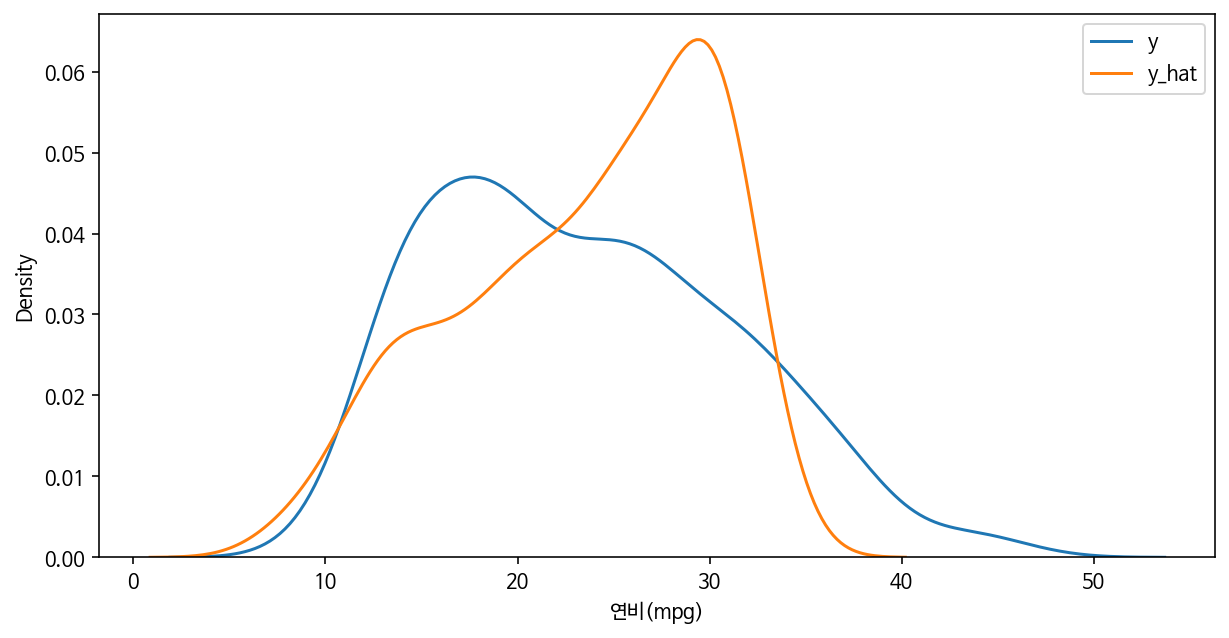

In [ ]:
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

In [ ]:
((df_y['y_hat'] - df_y['y'])**2).mean()

17.99017894105481

### 비선형회귀 분석
- 단순회귀 분석은 두 변수    간의 관계를 직선 형태로 설명하는 알고리즘이다.   
- 독립 변수 X와 종속 변수 Y 사이에 선형 상관관계가 있지만, 직선보다 곡선으로 설명하는 것이 적합할 때는 단순 회귀 분석은 부적합하다.    

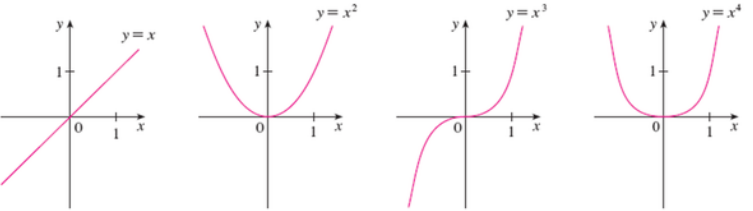   
- 다항회귀분석은 위 그림과 같이 2차함수 이상의 다항 함수를 사용하여 두 변수 간의 선형 관계를 설명한다.   
- 2차함수는 종속 변수 Y와 독립 변수 X 사이의 관계를 Y = zX<sup>2</sup> + bX + c로 표시하여 설명한다.   
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

In [ ]:
# 속성(변수) 선택
X=ndf[['차중']]  #독립 변수 X
y=ndf['연비(mpg)']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (274, 1)
test data 개수:  (118, 1)


In [ ]:
# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형
print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


In [ ]:
# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_test_poly=poly.fit_transform(X_test)     #X_train 데이터를 2차항으로 변형

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = pr.score(X_test_poly, y_test)
r_square

0.7087009262975479

In [ ]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat = pr.predict(X_test_poly)

In [ ]:
df_y_test = pd.DataFrame({'y_hat':y_hat, 'y':y_test})
df_y_test['차이']=df_y_test['y_hat']-df_y['y']
df_y_test

,y_hat,y,차이
243,24.665360,21.5,3.165360
371,26.544100,29.0,-2.455900
300,18.989293,23.9,-4.910707
345,35.166630,35.1,0.066630
265,15.167901,17.5,-2.332099
...,...,...,...
384,32.660293,32.0,0.660293
20,25.115790,25.0,0.115790
189,15.742081,15.5,0.242081
60,27.733581,20.0,7.733581


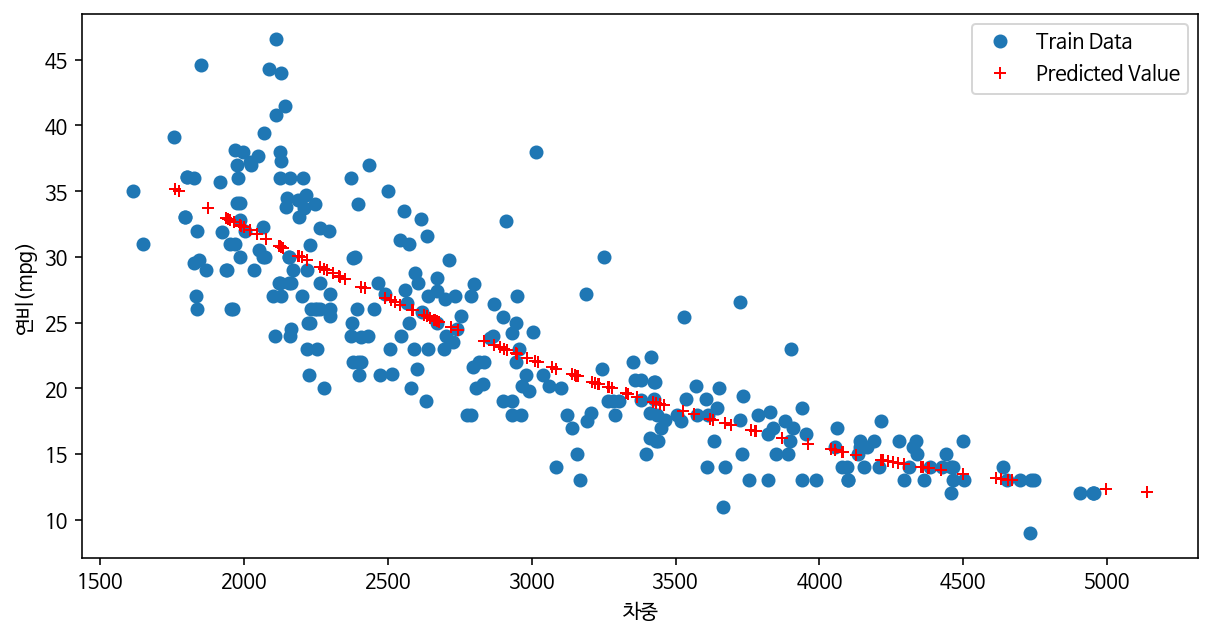

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('차중')
plt.ylabel('연비(mpg)')
plt.show()
plt.close()

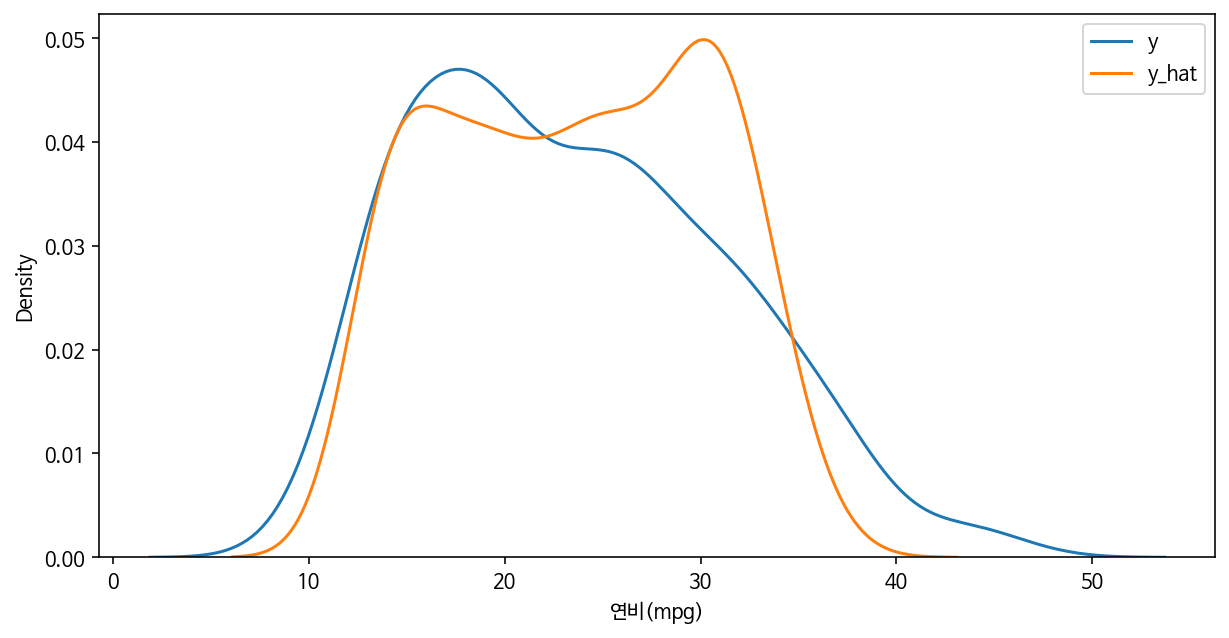

In [ ]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

In [ ]:
(df_y_test['y_hat']**2 + df_y_test['y']**2).mean()

1116.51035001263

### 다중회귀 분석
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

In [ ]:
# 속성(변수) 선택
X=ndf[['실린더 수','출력','차중']]  #독립 변수 X1, X2, X3
y=ndf['연비(mpg)']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (274, 3)
test data 개수:  (118, 3)


In [ ]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
r_square

0.6939048496695599

In [ ]:
# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_)

X 변수의 계수 a:  [-0.60691288 -0.03714088 -0.00522268]


In [ ]:
# 회귀식의 y절편
print('상수항 b', lr.intercept_)

상수항 b 46.414351269634025


In [ ]:
# 모형에 전체 X_test 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X_test)
#y_hat

In [ ]:
df_y = pd.DataFrame({'y_hat':y_hat, 'y':y_test})
df_y

,y_hat,y
243,26.302431,21.5
371,27.679604,29.0
300,20.354810,23.9
345,32.566333,35.1
265,15.050798,17.5
...,...,...
384,31.235698,32.0
20,26.800447,25.0
189,16.409892,15.5
60,28.067812,20.0


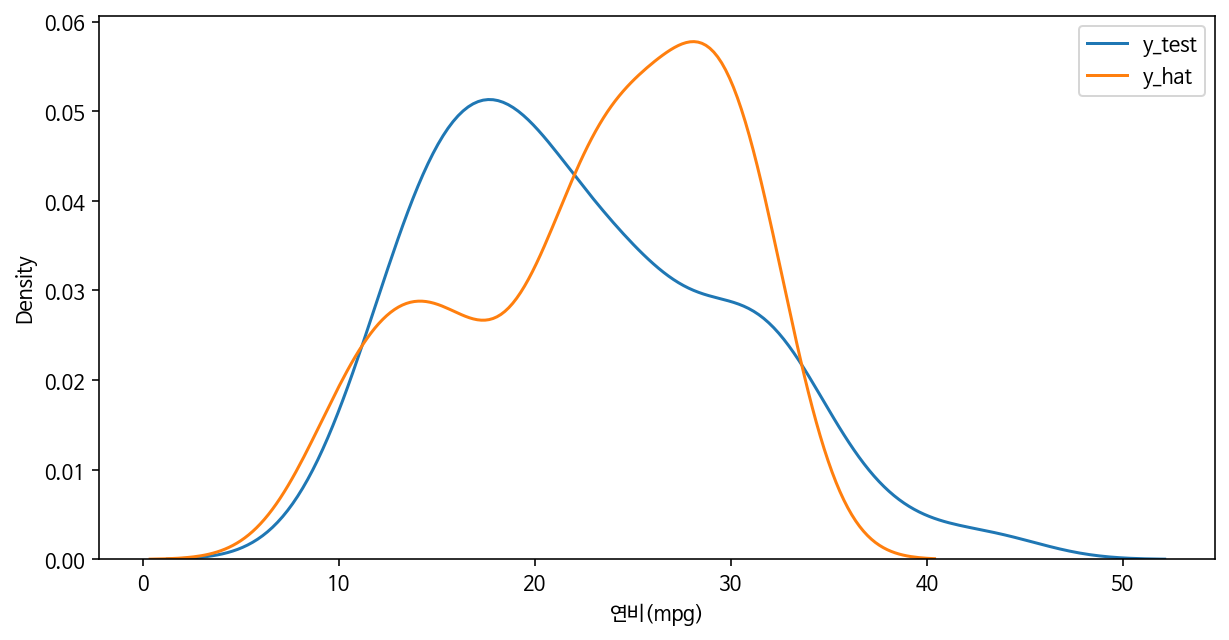

In [ ]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label="y_test")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

In [ ]:
(df_y['y_hat']**2 + df_y['y']**2).mean()

1127.730351962617